In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [13]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 15

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\\machine learning project\\Potato",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


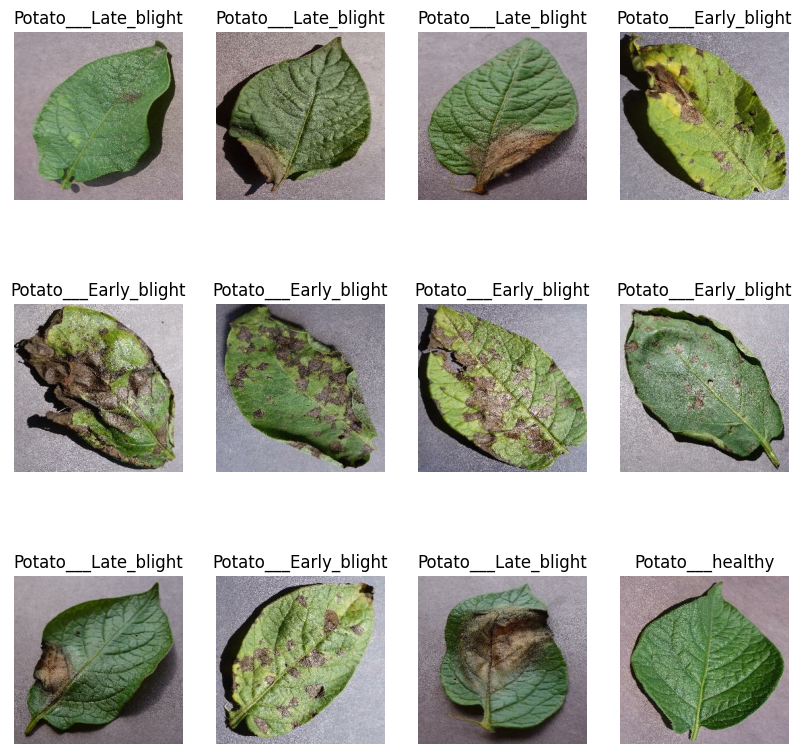

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off') 
plt.show()


In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [21]:
len(dataset)

68

In [22]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [23]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [24]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [26]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
   
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)
    
    return train_ds, val_ds, test_ds


In [27]:
train_ds, val_ds, test_ds =get_dataset_partitions_tf(dataset)

In [28]:
len(train_ds)

54

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_valds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [39]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [42]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

n_classes = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Build the model
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [43]:
history = model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/15
54/54 [==============================] - 164s 3s/step - loss: 0.8961 - accuracy: 0.5127 - val_loss: 0.7920 - val_accuracy: 0.6979
Epoch 2/15
54/54 [==============================] - 127s 2s/step - loss: 0.6533 - accuracy: 0.7147 - val_loss: 0.3816 - val_accuracy: 0.8438
Epoch 3/15
54/54 [==============================] - 125s 2s/step - loss: 0.4358 - accuracy: 0.8241 - val_loss: 0.2764 - val_accuracy: 0.8854
Epoch 4/15
54/54 [==============================] - 131s 2s/step - loss: 0.3309 - accuracy: 0.8559 - val_loss: 0.2670 - val_accuracy: 0.8802
Epoch 5/15
54/54 [==============================] - 127s 2s/step - loss: 0.2821 - accuracy: 0.8796 - val_loss: 0.3758 - val_accuracy: 0.8490
Epoch 6/15
54/54 [==============================] - 123s 2s/step - loss: 0.2364 - accuracy: 0.9161 - val_loss: 0.4219 - val_accuracy: 0.8333
Epoch 7/15
54/54 [==============================] - 121s 2s/step - loss: 0.2474 - accuracy: 0.9034 - val_loss: 0.2430 - val_accuracy: 0.9115
Epoch 8/15
54

In [44]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 9s 579ms/step - loss: 0.2978 - accuracy: 0.8906


First image to predict


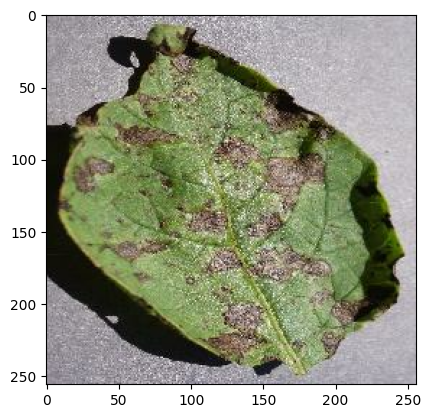

Actual label: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
Predicted label: Potato___Early_blight


In [46]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])